In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
from matplotlib.ticker import LogFormatter
import sys

from covid19model.data.model_parameters import get_integrated_willem2012_interaction_matrices
from covid19model.models.utils import read_coordinates_nis

agg = 'arr'
initN, Nc_all = get_integrated_willem2012_interaction_matrices(spatial=agg)

In [99]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", show_xlabel=True, show_ylabel=True, show_colorbar=True, vmin=None, vmax=None, ticks=None):

    if not ax:
        ax = plt.gca()
        
    if not vmin:
        vmin = np.min(data)
    if not vmax:
        vmax = np.max(data)

    # Plot the heatmap
    im = ax.imshow(data, norm=colors.LogNorm(vmin=vmin, vmax=vmax))

    # Create colorbar
    if show_colorbar:
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="8%", pad=0.2)
        formatter = LogFormatter(10, labelOnlyBase=False)
        cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=ticks, format=formatter, cax=cax)# **cbar_kw) #fraction=0.046, pad=0.04, **cbar_kw)
#         cbar.set_label(cbarlabel, fontsize=12)
        cbar.ax.set_yticklabels([2000, 10000, 100000, 200000])
        # cbar.ax.set_ylabel(cbarlabel, rotation=270, fontsize=15, labelpad=15) #, va="bottom"
        # cbar = ax.figure.colorbar(im, ax=ax, fraction=0.0001, pad=0.04, **cbar_kw, rotation=270, fontsize = 15, labelpad=15)
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    if show_xlabel:
        ax.set_xticklabels(col_labels)
    else:
        ax.set_xticklabels([None]*len(col_labels))
    if show_ylabel:
        ax.set_yticklabels(row_labels)
    else:
        ax.set_yticklabels([None]*len(row_labels))

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # Rotate the tick labels and set their alignment.
    matplotlib.pyplot.setp(ax.get_xticklabels(), rotation=-90, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    if show_colorbar:
        return im, cbar
    else:
        return im


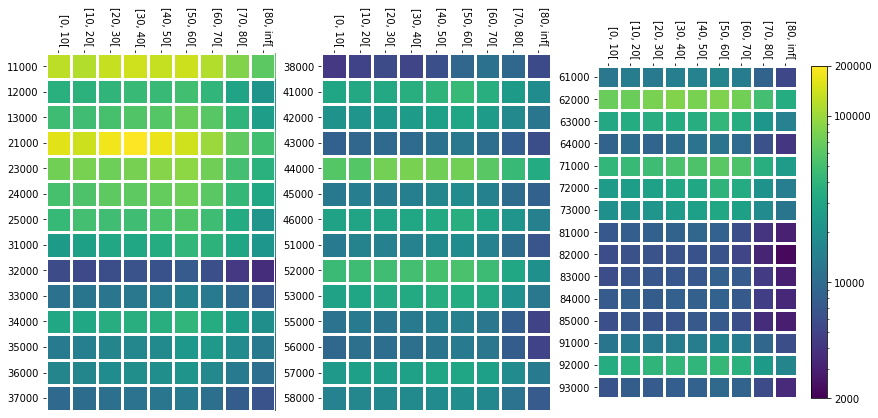

In [101]:
(G, N) = initN.shape

row_labels = read_coordinates_nis(spatial=agg)
row_labels0 = row_labels[:G//3]
initN0 = initN[:G//3,:]
row_labels1 = row_labels[G//3:2*G//3]
initN1 = initN[G//3:2*G//3,:]
row_labels2 = row_labels[2*G//3:]
initN2 = initN[2*G//3:,:]
column_labels = np.array(['[0, 10[', '[10, 20[', '[20, 30[', '[30, 40[', '[40, 50[', '[50, 60[', '[60, 70[', '[70, 80[', '[80, inf['])

fig, axs = plt.subplots(1, 3, figsize=(14, 8))
vmin=2000
vmax=200000
ticks=[2000, 10000, 100000, 200000]
heatmap(initN0, row_labels0, column_labels, ax=axs[0], vmin=vmin, vmax=vmax, show_colorbar=False)
heatmap(initN1, row_labels1, column_labels, ax=axs[1], vmin=vmin, vmax=vmax, show_colorbar=False)
heatmap(initN2, row_labels2, column_labels, ax=axs[2], vmin=vmin, vmax=vmax, ticks=ticks)

plt.savefig('pop_per_arr.png', dpi=400, bbox_inches='tight')